# Solving XOR problem using DNN

In [48]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import accuracy_score, precision_score,mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

### Define input data (X) and corresponding labels (y)

In [49]:
X = [[0, 0], [0, 1], [1, 0], [1, 1]]
y = [0, 1, 1, 0]

### Create a Multi-Layer Perceptron (MLP) Regressor model

In [50]:
regr = MLPRegressor(hidden_layer_sizes=(2),
                    activation='tanh',
                    solver='lbfgs')

### Fit the model on the input data and labels

In [51]:
model = regr.fit(X, y)


### Define resolution for visualization

In [52]:
res = 50
output = [None] * res


### Generate predictions for a grid of points and store in 'output'

In [53]:
for i in range(res):
    output[i] = [None] * res
    for j in range(res):
        x = np.array([i/res, j/res]).reshape(1, -1)
        output[i][j] = model.predict(x)[0]

### Visualize results using a grayscale image

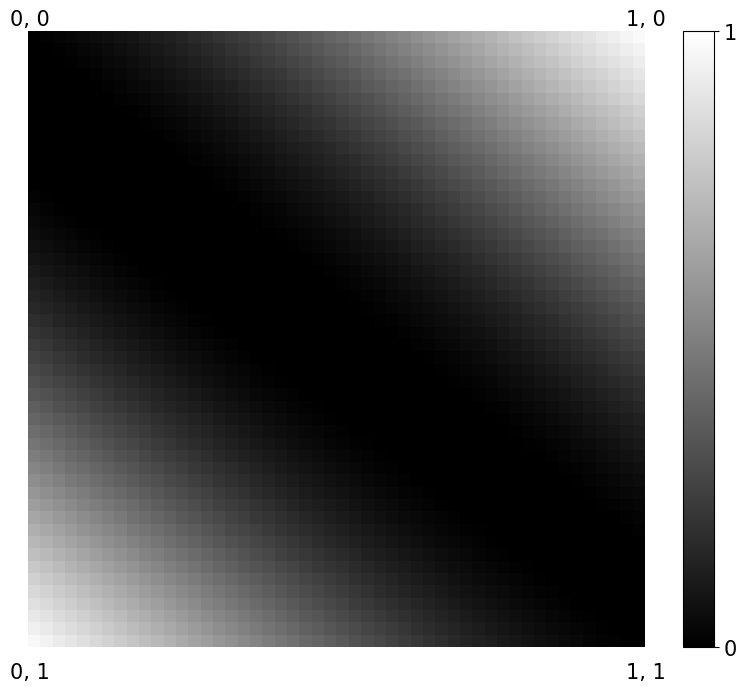

In [54]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)
cax = plt.imshow(np.array(output), interpolation='nearest', vmin=0, vmax=1)
cbar = fig.colorbar(cax, ticks=[0, 1])
cbar.ax.tick_params(labelsize=15)
plt.set_cmap('gray')
plt.axis('off')

# Annotate corners of the visualization with their corresponding input points
table = {'0, 0':(-2, -1),
         '0, 1':(-2, res+2),
         '1, 0':(res-2, -1),
         '1, 1':(res-2, res+2)}
for text, corner in table.items():
    ax.annotate(text, xy=corner, size=15, annotation_clip=False)

# Display the visualization
plt.show()

### Calculate predicted outputs for the original data points (X)

In [55]:
predicted_outputs = [round(model.predict(np.array(x).reshape(1, -1))[0]) for x in X]

### Calculating accuracy, precision and loss

In [56]:
#Calculate accuracy and precision using sklearn metrics
accuracy = accuracy_score(y, predicted_outputs)
precision = precision_score(y, predicted_outputs)
test_loss = mean_squared_error(y, predicted_outputs)

# Print calculated metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Test Loss:", test_loss)


Accuracy: 1.0
Precision: 1.0
Test Loss: 0.0
